In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
data = pd.read_csv('갈치.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [4]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

23:06:22 - cmdstanpy - INFO - Chain [1] start processing
23:06:23 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [6]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,3687.244925,3163.673731,4215.656806
26,2023-03-31,8401.532969,7873.784182,8957.535480
27,2023-04-30,0.000000,-3067.584372,-2002.472305
28,2023-05-31,8354.296780,7808.845711,8890.908779
29,2023-06-30,1902.049046,1397.358532,2433.179406
30,2023-07-31,9131.230953,8625.374861,9643.164357
31,2023-08-31,5235.523112,4721.882077,5775.155426
32,2023-09-30,1096.460329,574.513453,1612.111888
33,2023-10-31,3940.956281,3385.564503,4452.666014
34,2023-11-30,2472.430247,1971.111549,2950.874959


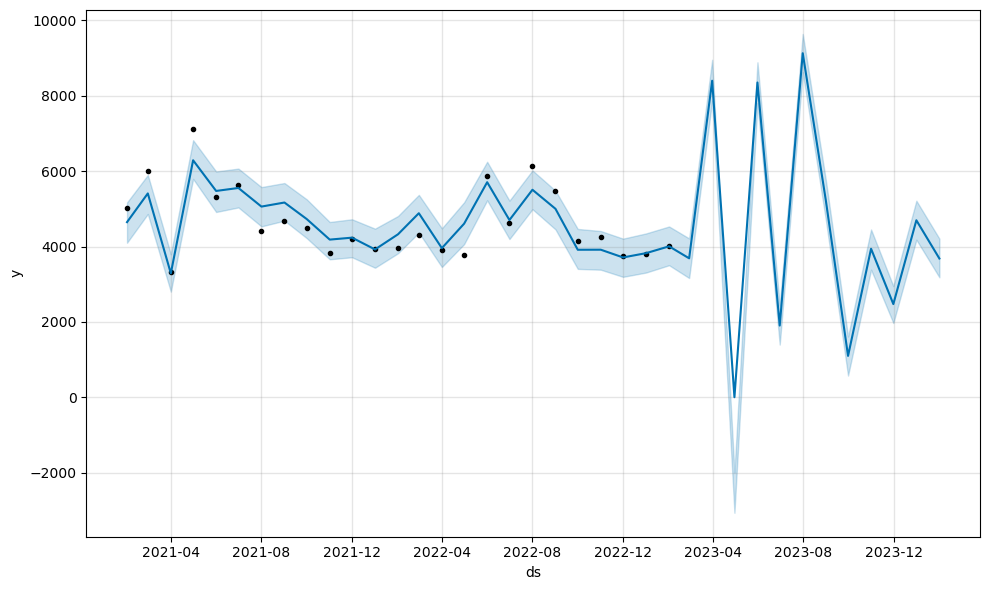

In [8]:
fig1 = model1.plot(forecast)

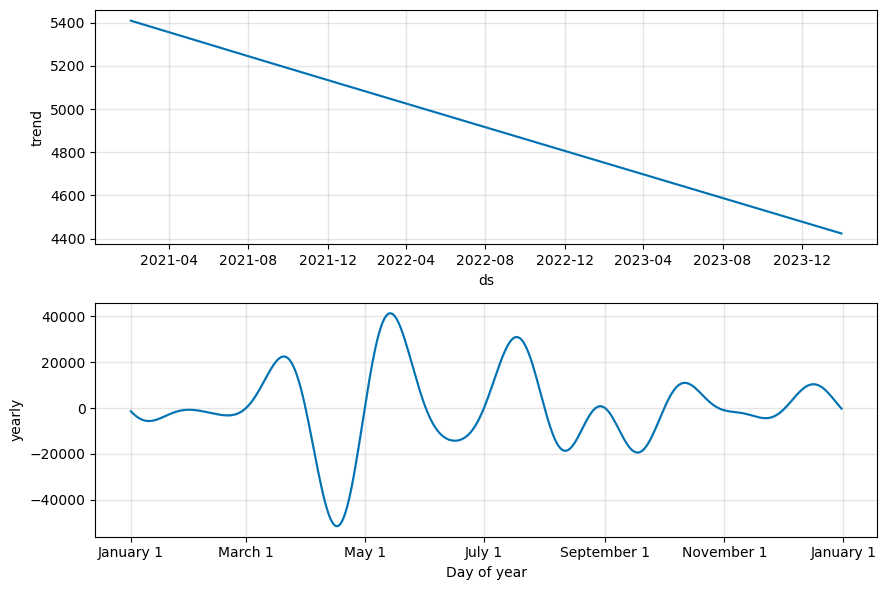

In [9]:
fig2 = model1.plot_components(forecast)

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('갈치.csv')

FileNotFoundError: [Errno 2] No such file or directory: '갈치.csv'

In [ ]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [ ]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

In [ ]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

In [ ]:
future_quantity = 50 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [ ]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])